In [1]:
# Supervised Learning with scikit-learn


In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()

In [4]:
#datasets. and press tab!

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
type(iris.target)

numpy.ndarray

In [8]:
X=iris.data
y=iris.target

In [9]:
y.shape


(150,)

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df = pd.DataFrame(X,columns = iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# Tässä kohtaa voisi käyttää standardscaleria!!

if(1):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(df)
    
    scaled_features = scaler.transform(df)
    df=pd.DataFrame(scaled_features, columns = iris.feature_names)

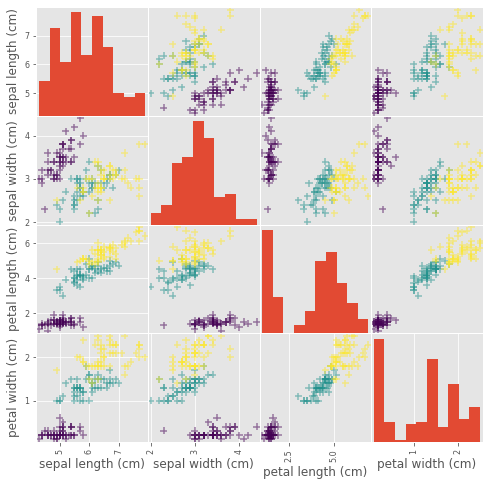

In [14]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize = [8,8], s=50, marker='+')

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [16]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])  # From DataCamp

In [17]:
prediction = knn.predict(X_new)

In [18]:
prediction

array([1, 1, 0])

In [19]:
# Measuring the performance
# Test on test data/new data for seeing how well your model gets generalized to unseen data



In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [21]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
print(F"Classification results: {y_pred}")

Classification results: [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [23]:
knn.score(X_test, y_test)

0.9555555555555556

In [24]:
#Model complexity plotting ehkä tähän

In [25]:
neighbors = np.arange(1, 9)  # Excluding 9
train_accuracy = np.empty(len(neighbors))  # initializing an empty numpy array
test_accuracy = np.empty(len(neighbors))

In [26]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) # Setting k here for the iteration round
    
    knn.fit(X_train, y_train) # Fit/Training the classifier to the training data
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

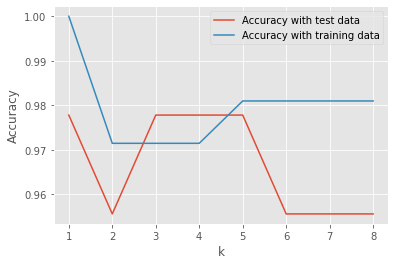

In [27]:
plt.plot(neighbors, test_accuracy, label = 'Accuracy with test data')
plt.plot(neighbors, train_accuracy, label = 'Accuracy with training data')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# You could then do proper reporting for example with Excel and Word!!